In [9]:
!pip3 install praw
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install nltk
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)



params = {'sort':'new', 'limit':None, 'time_filter':'all'}

columns = ['author', 'author_flair_text', 'clicked', 'comments', 'created_utc',
           'distinguished', 'edited', 'id', 'is_original_content', 'is_self',
           'link_flair_template_id', 'link_flair_text', 'locked', 'name',
           'num_comments', 'over_18', 'permalink', 'poll_data', 'saved', 'score',
           'selftext', 'spoiler', 'stickied', 'subreddit', 'title', 'upvote_ratio', 'url']



df = pd.DataFrame(columns=columns)
with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

subreddits = ['kelowna', 'wildfire', 'britishcolumbia', ]

for iteration in iterations:
    for subreddit in iteration['subreddits']:
        for keyword in iteration['keywords']:
            for submission in reddit.subreddit(subreddit).search(keyword, **params):
                new_row = {
                    'author': submission.author.name,
                    'created_utc': int(submission.created_utc),
                    'id': submission.id,
                    'name': submission.name,
                    'num_comments': submission.num_comments,
                    'permalink': submission.permalink,
                    'selftext': submission.selftext,
                    'subreddit': submission.subreddit.display_name,
                    'title': submission.title,
                    'upvote_ratio': submission.upvote_ratio,
                    'url': submission.url
                }
                df.loc[len(df)] = new_row

df = df.drop_duplicates(subset='id', keep='first')

df.to_csv('./reddit.csv', index=False)
df.head()


,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,gpbturtles,NaN,NaN,NaN,1694369908,NaN,NaN,16f7d58,NaN,NaN,...,NaN,NaN,NaN,\nPosting again while I try to avoid the heat ...,NaN,NaN,R4R40Plus,44 [m4f] UK/anywhere. I think I finally know w...,1.0,https://www.reddit.com/r/R4R40Plus/comments/16...
1,StaticBang,NaN,NaN,NaN,1694369874,NaN,NaN,16f7cn0,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,UFOs,Argentine soldiers fire anti-aircraft missiles...,1.0,https://v.redd.it/zj6uluo5zgnb1
2,Educational_Wind8921,NaN,NaN,NaN,1694369848,NaN,NaN,16f7c9u,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,u_Educational_Wind8921,tina fire,1.0,https://link.tribinagroup.co.id/PrnEq
3,fidllz,NaN,NaN,NaN,1694369798,NaN,NaN,16f7bio,NaN,NaN,...,NaN,NaN,NaN,I've been a regular for 9 years now and have n...,NaN,NaN,USPS,Stupid but real question,1.0,https://www.reddit.com/r/USPS/comments/16f7bio...
4,Leather-Agency7104,NaN,NaN,NaN,1694369790,NaN,NaN,16f7ber,NaN,NaN,...,NaN,NaN,NaN,Throwaway as my Reddit account uses my name.\n...,NaN,NaN,FIREUK,Help Optimising to FIRE,1.0,https://www.reddit.com/r/FIREUK/comments/16f7b...


In [11]:
df

,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,gpbturtles,NaN,NaN,NaN,1694369908,NaN,NaN,16f7d58,NaN,NaN,...,NaN,NaN,NaN,\nPosting again while I try to avoid the heat ...,NaN,NaN,R4R40Plus,44 [m4f] UK/anywhere. I think I finally know w...,1.00,https://www.reddit.com/r/R4R40Plus/comments/16...
1,StaticBang,NaN,NaN,NaN,1694369874,NaN,NaN,16f7cn0,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,UFOs,Argentine soldiers fire anti-aircraft missiles...,1.00,https://v.redd.it/zj6uluo5zgnb1
2,Educational_Wind8921,NaN,NaN,NaN,1694369848,NaN,NaN,16f7c9u,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,u_Educational_Wind8921,tina fire,1.00,https://link.tribinagroup.co.id/PrnEq
3,fidllz,NaN,NaN,NaN,1694369798,NaN,NaN,16f7bio,NaN,NaN,...,NaN,NaN,NaN,I've been a regular for 9 years now and have n...,NaN,NaN,USPS,Stupid but real question,1.00,https://www.reddit.com/r/USPS/comments/16f7bio...
4,Leather-Agency7104,NaN,NaN,NaN,1694369790,NaN,NaN,16f7ber,NaN,NaN,...,NaN,NaN,NaN,Throwaway as my Reddit account uses my name.\n...,NaN,NaN,FIREUK,Help Optimising to FIRE,1.00,https://www.reddit.com/r/FIREUK/comments/16f7b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,Interesting-Lead9916,NaN,NaN,NaN,1691979852,NaN,NaN,15qhnlr,NaN,NaN,...,NaN,NaN,NaN,Anyone know when it’ll be back up missed apply...,NaN,NaN,Wildfire,USAJOBS Down,1.00,https://www.reddit.com/r/Wildfire/comments/15q...
1653,81degrees,NaN,NaN,NaN,1691979782,NaN,NaN,15qhmpd,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,Wildfire,Wildfire Podcast Episodes,0.25,https://triplepointpodcast.com/tag/wildfires/
1655,jondengwayfares,NaN,NaN,NaN,1691963816,NaN,NaN,15qbimh,NaN,NaN,...,NaN,NaN,NaN,Hi all-new here. I'm an Army veteran and was i...,NaN,NaN,Wildfire,Anyone looking for a battle buddy/accountabili...,0.95,https://www.reddit.com/r/Wildfire/comments/15q...
1656,Galacto_Dino_Shark,NaN,NaN,NaN,1691962372,NaN,NaN,15qax8k,NaN,NaN,...,NaN,NaN,NaN,Wouldn’t the inclusion of housing in federal j...,NaN,NaN,Wildfire,Why isn’t housing offered through every federa...,0.98,https://www.reddit.com/r/Wildfire/comments/15q...


In [12]:


df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()

0    2023-09-10 12:18:28
1    2023-09-10 12:17:54
2    2023-09-10 12:17:28
3    2023-09-10 12:16:38
4    2023-09-10 12:16:30
Name: created_utc_clean, dtype: object

In [13]:
df['created_utc_clean'].tail()

1652    2023-08-13 20:24:12
1653    2023-08-13 20:23:02
1655    2023-08-13 15:56:56
1656    2023-08-13 15:32:52
1657    2023-08-13 11:00:29
Name: created_utc_clean, dtype: object

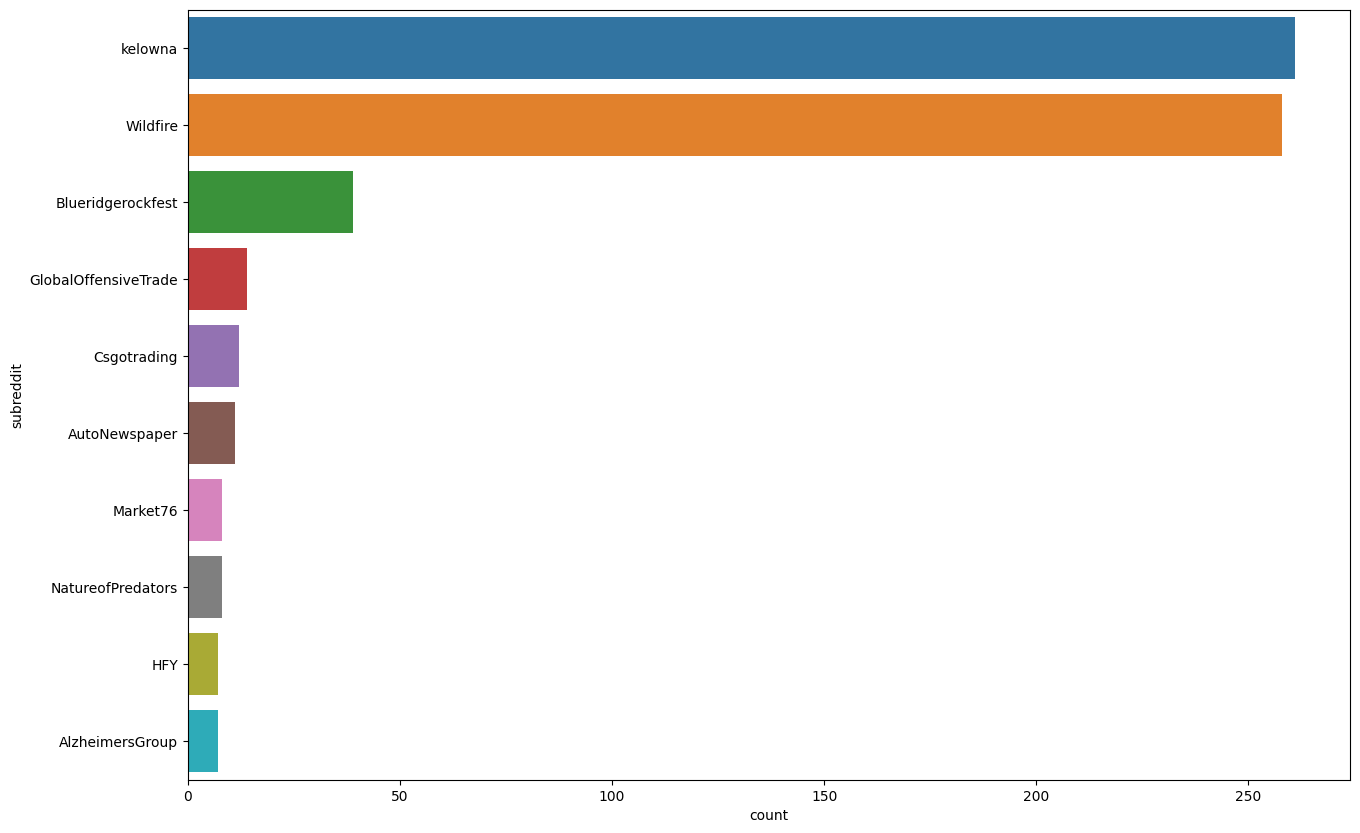

In [14]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().iloc[:10].index, ax=ax)
plt.show()

In [15]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-da

True

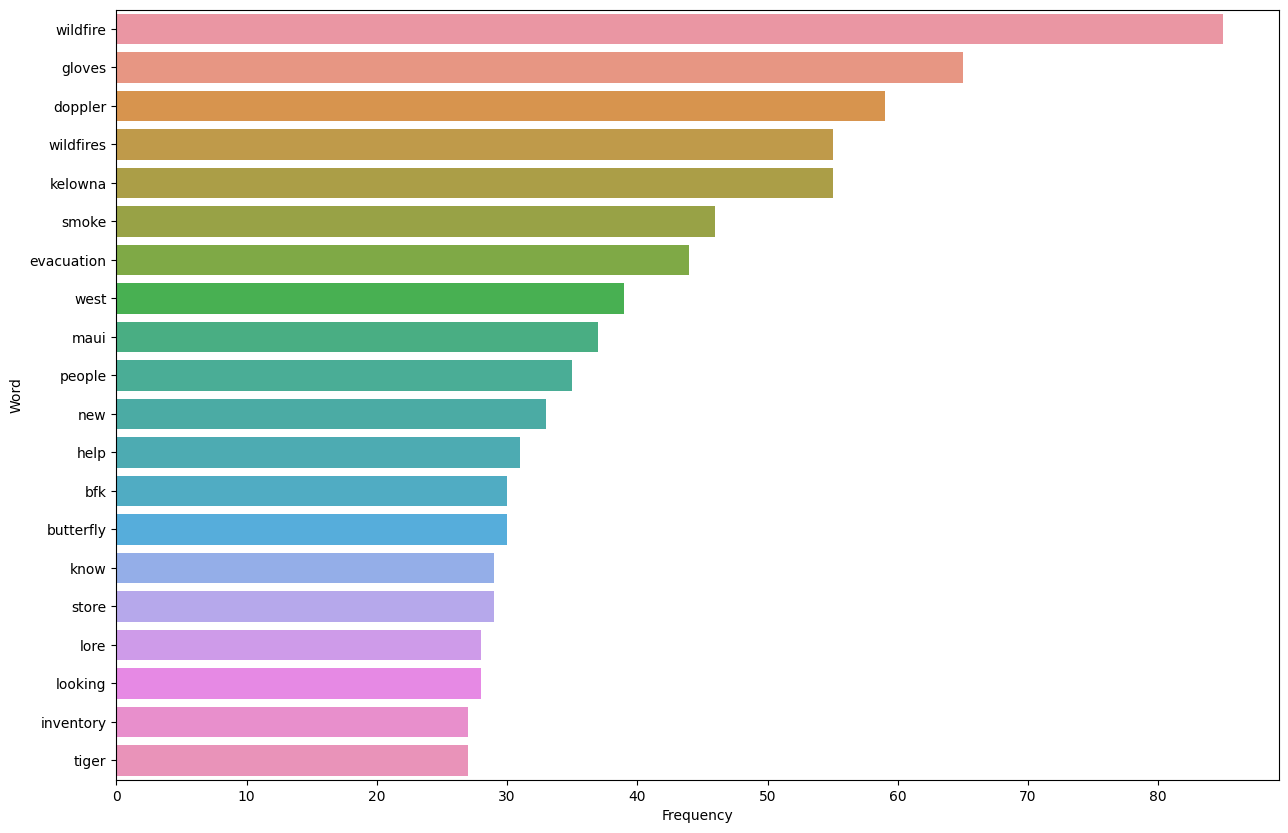

In [16]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS


fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(df['title'].tolist())
all_titles = all_titles.lower()
words = word_tokenize(all_titles)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df = word_counts_df[word_counts_df['Word'].str.len() > 2]
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(STOPWORDS)]

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()

0    2023-09-10
1    2023-09-10
2    2023-09-10
3    2023-09-10
4    2023-09-10
Name: created_utc, dtype: object
created_utc
2023-09-10    641
2023-09-09    230
2023-09-08    112
2023-08-18     97
2023-08-19     59
2023-08-20     40
2023-08-21     30
2023-08-23     23
2023-08-24     18
2023-08-22     17
2023-09-02     16
2023-09-07     15
2023-09-05     15
2023-08-29     15
2023-08-28     14
2023-09-06     14
2023-08-31     13
2023-08-14     12
2023-08-25     11
2023-09-03     11
2023-08-16     10
2023-08-15      8
2023-09-04      8
2023-08-17      7
2023-09-01      6
2023-08-30      6
2023-08-26      5
2023-08-27      5
2023-08-10      4
2023-08-11      3
2023-08-13      3
2023-08-12      2
Name: count, dtype: int64


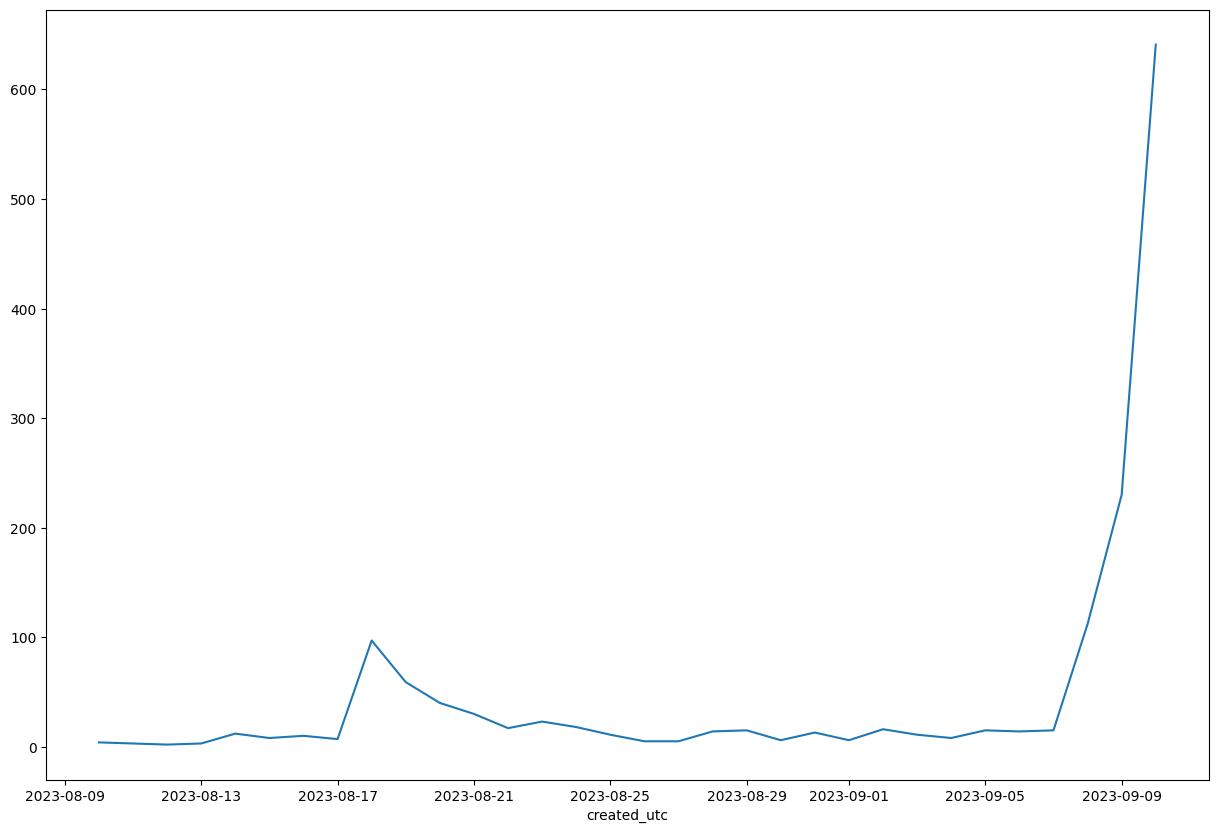

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()
df_copy['created_utc'] = df_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = df_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()